### [질문 1] download 정의는 왜 하는 것인가?

**Download 함수 정의**

* 얘들은 항상 실행을 시켜줘야!

In [4]:
# download 정의
def download(method,url,param=None, data=None, timeout=1,maxretries=3):
#원래 header도 있어야된다. 위에 정의한거 쓸꺼야  
    try:
        resp=requests.request(method, url, params=param, data=data, headers=headers)
        resp.raise_for_status()#강제로 에러를 내는 코드
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code<600 and maxretries>0:
            time.sleep(timeout)
            print("재시도")
            resp=download(method,url,param,data,timeout,maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

- HTTP client가 requests하면 server가 respond 하면서 이루어진다
- 이 HTTP에 error가 발생할수도 있다
    - 2xx : 정상 작동
    - 4xx : 나로 인한 에러. 
    - 5xx : 상대로 부터 인한 에러. 조금만 놔두면 정상(2xx)이 될 수 있다
- 이러한 시도를 해라고 try - except 구문이 있다

### [질문2] 이걸 지금 바로 이해 못해도 배운 전체를 설명해주는 것이기 때문에 밑에 하다 모르면 다시 보면서 이해하기
**첫 번째로 한 것은 crawler 그리고 이는 inbound를 부여하기 위해서**
**두 번째로 한 것은 scraping을 하기 위해서**

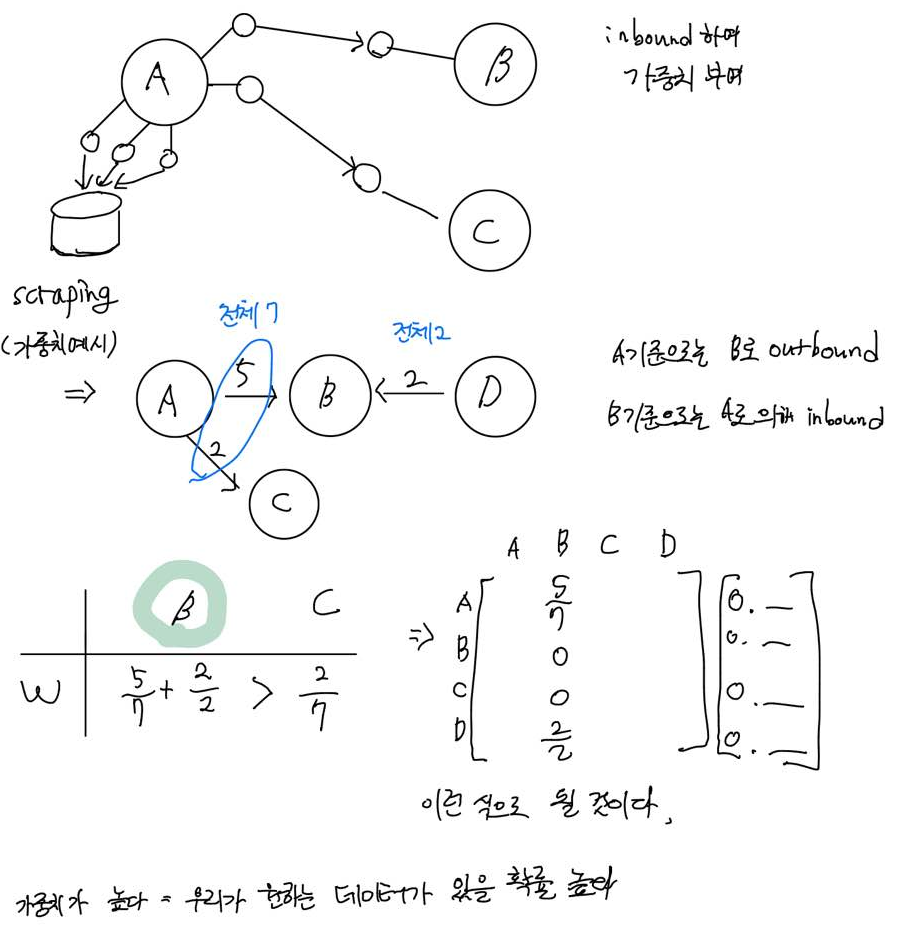

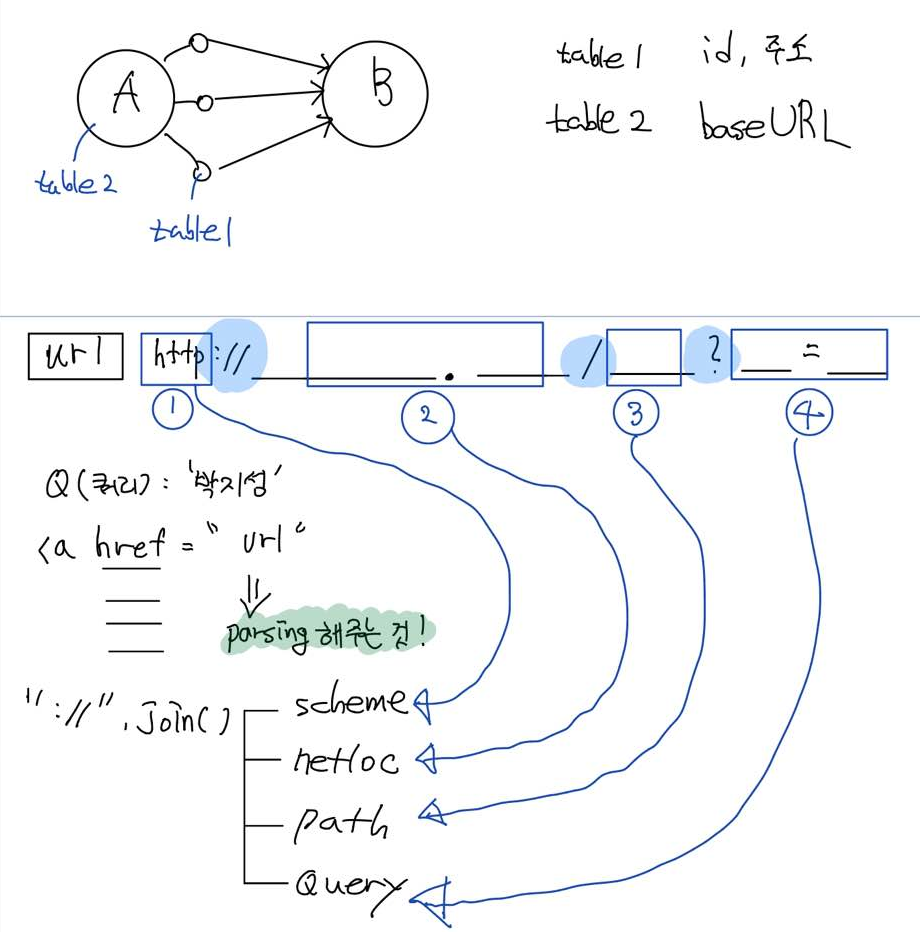
- base url : 예를 들면 www.naver.com 같은 애들

### - 기본적으로 실행해야할 것들 실행

In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import urllib
import json
import requests
import re

# 1. crawling

- Web crawlers are known by a variety of names.
- Systematically browses the World Wide Web
- Typically for the purpose of Web indexing
- They index what words are used on a website and in what context

[정의] 웹 크롤링, 웹 크롤러는 인터넷 상에 있는 수많은 자료들을 가져와 프로그래밍하기 쉽게, 혹은 데이터 분석하기 쉬운 형태로 가공하는 작업을 의미합니다.

# 2. scrapy
- web-spider or web scraper framework

[정의] 특정 데이터를 추출하는 것

**crawling과 scrapy는 다른 개념이다**

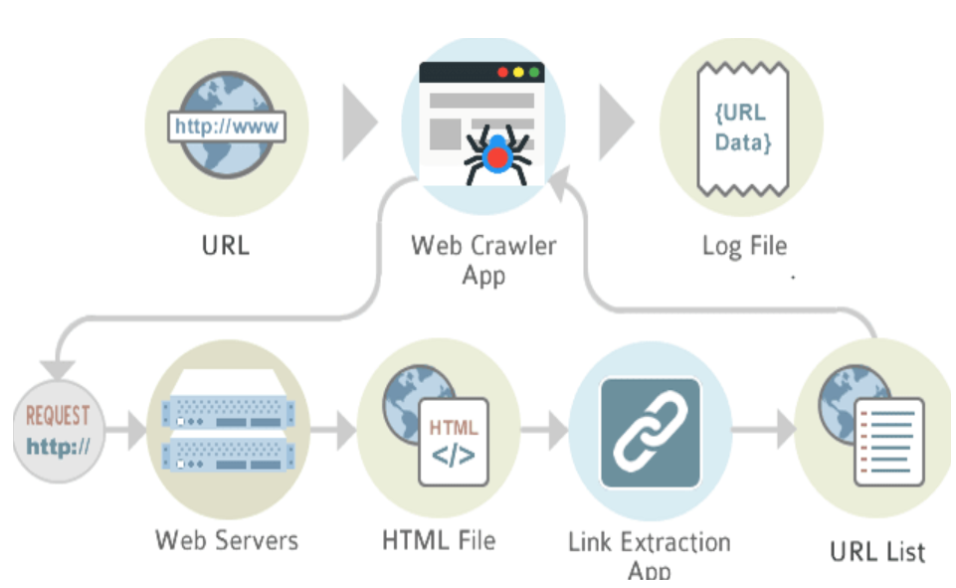

In [3]:
# http://example.webscraping.com/places/default/index/의 데이터를 이용
# 여기서 HTML 주소를 보면, 클릭가능한 모든 것들이 a
# 이를 모두 큐에 집어넣는다

In [5]:
headers = None # 따로 헤더 지정 안해줘도 안막아놨으면 괜춘

url = "http://example.webscraping.com/places/default/index"

html = download("get", url)

In [6]:
dom = BeautifulSoup(html.text, 'lxml')

In [7]:
[_['href'] for _ in dom.find_all("a")]

['#',
 '/places/default/user/register?_next=/places/default/index',
 '/places/default/user/login?_next=/places/default/index',
 '/places/default/index',
 '/places/default/search',
 '/places/default/view/Afghanistan-1',
 '/places/default/view/Aland-Islands-2',
 '/places/default/view/Albania-3',
 '/places/default/view/Algeria-4',
 '/places/default/view/American-Samoa-5',
 '/places/default/view/Andorra-6',
 '/places/default/view/Angola-7',
 '/places/default/view/Anguilla-8',
 '/places/default/view/Antarctica-9',
 '/places/default/view/Antigua-and-Barbuda-10',
 '/places/default/index/1']

In [8]:
# # 같은 애들 없애주자/ 길이가 짧은 거 제거하면 된다
[_['href'] for _ in dom.find_all("a") if len(_["href"])>3]

['/places/default/user/register?_next=/places/default/index',
 '/places/default/user/login?_next=/places/default/index',
 '/places/default/index',
 '/places/default/search',
 '/places/default/view/Afghanistan-1',
 '/places/default/view/Aland-Islands-2',
 '/places/default/view/Albania-3',
 '/places/default/view/Algeria-4',
 '/places/default/view/American-Samoa-5',
 '/places/default/view/Andorra-6',
 '/places/default/view/Angola-7',
 '/places/default/view/Anguilla-8',
 '/places/default/view/Antarctica-9',
 '/places/default/view/Antigua-and-Barbuda-10',
 '/places/default/index/1']

In [9]:
# urljoin을 통해 전체 주소로 만들자
[requests.compat.urljoin(url, _['href']) 
for _ in dom.find_all("a") if len(_["href"])>3]

['http://example.webscraping.com/places/default/user/register?_next=/places/default/index',
 'http://example.webscraping.com/places/default/user/login?_next=/places/default/index',
 'http://example.webscraping.com/places/default/index',
 'http://example.webscraping.com/places/default/search',
 'http://example.webscraping.com/places/default/view/Afghanistan-1',
 'http://example.webscraping.com/places/default/view/Aland-Islands-2',
 'http://example.webscraping.com/places/default/view/Albania-3',
 'http://example.webscraping.com/places/default/view/Algeria-4',
 'http://example.webscraping.com/places/default/view/American-Samoa-5',
 'http://example.webscraping.com/places/default/view/Andorra-6',
 'http://example.webscraping.com/places/default/view/Angola-7',
 'http://example.webscraping.com/places/default/view/Anguilla-8',
 'http://example.webscraping.com/places/default/view/Antarctica-9',
 'http://example.webscraping.com/places/default/view/Antigua-and-Barbuda-10',
 'http://example.webscr

In [10]:
# parseURL 정의하기
def parseURL(seed):
    html = download("get", seed)
    dom = BeautifulSoup(html.text, 'lxml')
    
    return [requests.compat.urljoin(url, _['href']) 
            for _ in dom.find_all("a") if len(_["href"])>3]

In [11]:
import time

In [40]:
# seed를 준 애 찾기
queue = list() # 리스트로 만들어주기
queue.append("http://example.webscraping.com/places/default/index")
seen = list()
# 큐에 append. 큐에 더이상 데이터가 없을 때까지 돈다
while queue:
    baseURL = queue.pop(0)
    seen.append(baseURL)
    time.sleep(10) #무한정 반복되므로 sleep로 정해놓는다
    linkList = parseURL(baseURL)
    # parseURL 이용해서 합친다 
    # url = seen 문제 볼 거다
    # 계속해서 url 중복해서 생기는 문제 발생할 수도 있다
    for link in linkList:
        if not link in queue and link not in seen:
            queue.append(link)
    print("Quene : {0}, Seen : {1}".format(len(queue),len(seen)))


Quene : 14, Seen : 1
Quene : 15, Seen : 2
Quene : 14, Seen : 3


KeyboardInterrupt: 

### 2.1 구글에서 해보기

<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>박보영 - Google 검색</title><script nonce="H3cfHrIPoAQyPs+/Sc4CNA==">(function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&zx="+(new Date).getTime());var a=new Image,d=e++;c[d]=a;a.onerror=a.onload=a.onabort=function(){delete c[d]};a.src=b};}).call(this);</script><style>body{margin:0 auto;max-width:736px;padding:0 8px}a{color:#1967D2;text-decoration:none;tap-highlight-color:rgba(0,0,0,.1)}a:visited{color:#4B11A8}a:hover{text-decoration:underline}img{border:0
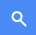
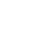
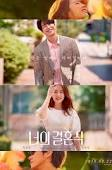
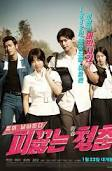
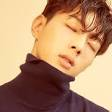
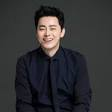
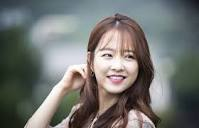
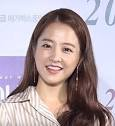
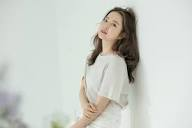

In [12]:
url = "https://www.google.com/search"
params = {
    "hl": "ko",
    "source": "hp",
    "ei": "fOQnXdWBKIO88QXG3IuACg",
    "q": "박보영",
    "oq": "박보영"
}

html = download("get", url, param=params)
print(html.text)
dom = BeautifulSoup(html.text, "lxml")

In [13]:
[requests.compat.urljoin(url, _['href']) 
 for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"])>3]
print(len([requests.compat.urljoin(url, _['href']) 
           for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"])>3]
))

86


- header를 봇에 심어줘야한다. 그렇게 해야 봇이 아닌 척 할 수 있다

In [14]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

url = "https://www.google.com/search"
param = {
    "q" : "박보영"
}
html = download("get",url,param)
dom = BeautifulSoup(html.text, "lxml")

In [15]:
html.request.headers

{'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

- 검색한 내용의 링크들을 다 가져오고 싶다
- 페이지 소스를 통해 공통된 부분을 찾자
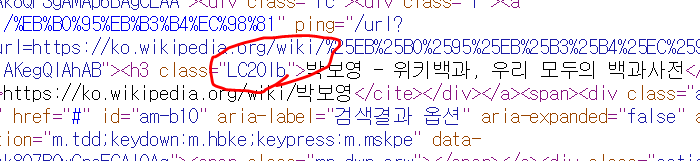

In [16]:
len(dom.select(".LC20lb"))

9

In [17]:
[_.find_parent()["href"] for _ in dom.select(".LC20lb")]

['https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D',
 'https://news.joins.com/article/22895953',
 'https://movie.daum.net/person/main?personId=105244',
 'http://m.cafe.daum.net/parkboyoungfd',
 'https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://www.msn.com/ko-kr/entertainment/news/%EB%84%88%EC%9D%98-%EA%B2%B0%ED%98%BC%EC%8B%9D-%E2%86%92-%EC%96%B4%EB%B9%84%EC%8A%A4-%EB%B0%95%EB%B3%B4%EC%98%81-%EA%B7%BC%ED%99%A9-%EC%82%B4%ED%8E%B4%EB%B3%B4%EB%8B%88%E2%80%A6%E2%80%9C%EC%97%AC%EC%A0%84%ED%9E%88-%EB%BD%80%EB%B8%94%EB%A6%AC%E2%80%9D/ar-BBUOmqm',
 'https://www.msn.com/ko-kr/entertainment/news/%EB%B0%95%EB%B3%B4%EC%98%81-tvn-%EB%93%9C%EB%9D%BC%EB%A7%88-%EC%96%B4%EB%B9%84%EC%8A%A4-%EC%97%AC%EC%A3%BC%EC%9D%B8%EA%B3%B5/ar-BBLZzVh']

In [18]:
# seed를 준 애 찾기
quene = list()
quene.append([_.find_parent()["href"] for _ in dom.select(".LC20lb")]) # ????????????????????????????????????
seen = list()
# 큐에 append. 큐에 더이상 데이터가 없을 때까지 돈다
while quene:
    baseURL = quene.pop(0)
    seen.append(baseURL)
    time.sleep(10) #무한정 반복되므로 sleep로 정해놓는다
    linkList = parseURL(baseURL)
    # quene.extend(linkList) #flat 하게 펴서 lsit에 붙인다. 계속해서 붙이는 것
    
    # url = seen 문제 볼 거다
    # 계속해서 url 중복해서 생기는 문제 발생할 수도 있다

    for link in linkList:
        if not link in quene and  link not in seen:
            quene.append(link)
            
    print("Quene : {0}, Seen : {1}".format(len(quene),len(seen)))
        


InvalidSchema: No connection adapters were found for '['https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81', 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81', 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D', 'https://news.joins.com/article/22895953', 'https://movie.daum.net/person/main?personId=105244', 'http://m.cafe.daum.net/parkboyoungfd', 'https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81', 'https://www.msn.com/ko-kr/entertainment/news/%EB%84%88%EC%9D%98-%EA%B2%B0%ED%98%BC%EC%8B%9D-%E2%86%92-%EC%96%B4%EB%B9%84%EC%8A%A4-%EB%B0%95%EB%B3%B4%EC%98%81-%EA%B7%BC%ED%99%A9-%EC%82%B4%ED%8E%B4%EB%B3%B4%EB%8B%88%E2%80%A6%E2%80%9C%EC%97%AC%EC%A0%84%ED%9E%88-%EB%BD%80%EB%B8%94%EB%A6%AC%E2%80%9D/ar-BBUOmqm', 'https://www.msn.com/ko-kr/entertainment/news/%EB%B0%95%EB%B3%B4%EC%98%81-tvn-%EB%93%9C%EB%9D%BC%EB%A7%88-%EC%96%B4%EB%B9%84%EC%8A%A4-%EC%97%AC%EC%A3%BC%EC%9D%B8%EA%B3%B5/ar-BBLZzVh']'

### 2-2 네이버 실습

In [41]:
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EB%B0%95%EB%B3%B4%EC%98%81"
param = {
    "query":"박보영"
}
html = download("get", url, param)
dom = BeautifulSoup(html.text, "lxml")

In [64]:
[_["href"]  for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")][3:]


['https://blog.naver.com/js2y86?Redirect=Log&logNo=221530397718',
 'https://blog.naver.com/dlqlwm14?Redirect=Log&logNo=221529807195']

In [65]:
requests.compat.urlparse("https://blog.naver.com/imagetech1?Redirect=Log&logNo=221530358950")

ParseResult(scheme='https', netloc='blog.naver.com', path='/imagetech1', params='', query='Redirect=Log&logNo=221530358950', fragment='')

In [66]:
def checkBlog(url):
    return requests.compat.urlparse(url)[1] == "blog.naver.com"

In [67]:
checkBlog("https://blog.naver.com/imagetech1?Redirect=Log&logNo=221530358950")

True

In [68]:
[_["href"]  for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")[3:]
if checkBlog(_["href"])]

['https://blog.naver.com/js2y86?Redirect=Log&logNo=221530397718',
 'https://blog.naver.com/dlqlwm14?Redirect=Log&logNo=221529807195']

In [81]:
# [3:] 해준 이유는 3번 째 주소가 이상한 값이 들어있어서 에러떠서 그냥 해준거

In [69]:
def parseURL(seed):
    html = download("get", seed)
    dom = BeautifulSoup(html.text, 'lxml')
    

    print(seed, dom.select("#mainFrame"))
    url, 
    if len(dom.select("#mainFrame")) <1:
        return [] #iframe로 #mainFrame 들어 있을 수도 있어서 체크
                  # 0개면 그냥 넘길 수 있게
    
    seed = requests.compat.urljoin(seed, dom.select("#mainFrame")[0]["src"])
    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, 'lxml')
    
    # print(requests.compat.urljoin(seed, dom.select("#mainFrame")[0]["src"]))
    
    return [requests.compat.urljoin(seed, _['href']) 
             for _ in dom.find_all("a") 
             if len(_["href"])>3 and checkBlog(requests.compat.urljoin(seed, _["href"]))]

In [70]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
url = "https://search.naver.com/search.naver"

param = {
    "query" : "박보영"
}
html = download("get",url,param)
dom = BeautifulSoup(html.text, "lxml")

In [71]:
# seed를 준 애 찾기

quene = list()
quene.extend([_["href"]  
              for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")
              # quene.extend([_["href"]  for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")

              if checkBlog(_["href"])])

seen = list()
    
print(quene) # 큐에 append. 큐에 더이상 데이터가 없을 때까지 돈다

while quene:
    baseURL = quene.pop(0)
    seen.append(baseURL)
    time.sleep(1) #무한정 반복되므로 sleep로 정해놓는다
    linkList = parseURL(baseURL)

    for link in linkList:
        if not link in quene and  link not in seen:
            quene.append(link)
            
    print("Quene : {0}, Seen : {1}".format(len(quene),len(seen)))

['https://blog.naver.com/imagetech1?Redirect=Log&logNo=221530358950', 'https://blog.naver.com/js2y86?Redirect=Log&logNo=221530397718', 'https://blog.naver.com/dlqlwm14?Redirect=Log&logNo=221529807195']
https://blog.naver.com/imagetech1?Redirect=Log&logNo=221530358950 [<iframe allowfullscreen="true" id="mainFrame" name="mainFrame" onload="oFramesetTitleController.start(self.frames['mainFrame'], self, sTitle);oFramesetTitleController.onLoadFrame();oFramesetUrlController.start(self.frames['mainFrame']);oFramesetUrlController.onLoadFrame()" scrolling="auto" src="/PostView.nhn?blogId=imagetech1&amp;logNo=221530358950&amp;from=search&amp;redirect=Log&amp;widgetTypeCall=true&amp;directAccess=false"></iframe>]
Quene : 17, Seen : 1
https://blog.naver.com/js2y86?Redirect=Log&logNo=221530397718 [<iframe allowfullscreen="true" id="mainFrame" name="mainFrame" onload="oFramesetTitleController.start(self.frames['mainFrame'], self, sTitle);oFramesetTitleController.onLoadFrame();oFramesetUrlController.

KeyboardInterrupt: 

### 2- 3 다음

In [28]:
def parseURL(seed):
    urlList = list()
    
    html = download("get", seed[0]) #seed[0]은 주소
    dom = BeautifulSoup(html.text, "lxml")
    
    return [(requests.compat.urljoin(seed[0],_["href"]), seed[1]+1) for _ in dom.find_all("a") \
             if seed[1]<2 and _.has_attr("href") and len(_["href"]) > 3
           and checkBlog(requests.compat.urljoin(seed[0], _["href"]))]

def checkBlog(url):
    return requests.compat.urlparse(url)[1].endswith("tistory.com")

    
url = "https://search.daum.net/search"
params = {
    "q": "박보영"
}

html = download("get", url, param=params)

dom = BeautifulSoup(html.text, "lxml")
seedList = [_["href"] for _ in dom.select("#blogColl a.f_link_b") if checkBlog(_["href"])]
print(seedList)

queue =list()
##tuple 형식으로 depth를 추가해준다
queue.extend([(_["href"],1) for _ in dom.select("#blogColl a.f_link_b") if checkBlog(_["href"])])
#print(queue)

seen=list()
while queue:
    baseURL=queue.pop(0)
    seen.append(baseURL)
    time.sleep(1)
        
    linkList=parseURL(baseURL)
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("queue: {0}, seen:{1}".format(len(queue),len(seen)))
    #queue.extend(linkList)
    
##96까지 나와야함

['http://adam24eve.tistory.com/858', 'http://cscs0717.tistory.com/27', 'http://listup.tistory.com/248', 'http://34344541.tistory.com/43']
queue: 45, seen:1
queue: 61, seen:2
queue: 85, seen:3
queue: 92, seen:4
queue: 91, seen:5


KeyboardInterrupt: 

### 2-4 DB에 데이터 넣기

- 기본적으로 Primary Key 값 있어야 한다.
- PK 값 안에 문자열 있으면 못 읽는다

### 필요한 것들

1. id 값
2. 데이터 값
3. scrapy
4. seen인지 아닌지 체크하는 애

id, url, seen, date

table1 =id, url, seen, date = id, path, param, seen, date

table2 =id, netloc, date # 두 개의 데이터 수집 시점은 다르다

url = netloc + path + param # url의 형태

url # pk 값이 들어있ot

In [72]:
# 봇을 만들자 
import sqlite3
con = sqlite3.connect("1.db") 
cur = con.cursor()

In [73]:
cur.executescript("""
            DROP TABLE IF EXISTS table1;
            CREATE TABLE table1(
            id     INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            table2_id INTEGER NOT NULL,
            path   TEXT NOT NULL,
            param  TEXT NOT NULL,
            seen   BOOLEAN DEFAULT FALSE NOT NULL,
            date   TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
            
            );
            DROP TABLE IF EXISTS table2;
            CREATE TABLE table2(
            id     INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            netloc TEXT NOT NULL,
            date   TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
            
            
            );

"""
)
con.commit()

# 제일 위에 정리한 것을 보자
# table 2는 항상 table 1과 관련되어 있기 때문에 table2_id를 만들었다

In [75]:
# Seed URLs 만드는 부분. -> DB Insert 
url = "https://www.google.com/search?"
html = download("get", url, param={'q':"박보영"})
dom = BeautifulSoup(html.text, "lxml")

queue =list()
for href in ([_.find_parent()["href"] for _ in dom.select(".LC20lb")]):
    netloc = "://".join(requests.compat.urlparse(href)[:2])
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
    netlocID = cur.fetchone()
    
    if not netlocID:
        cur.execute("INSERT INTO table2(netloc) VALUES(?)",[netloc])
        
        con.commit()
        
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
        netlocID = cur.fetchone()
    else:
        print(cur.lastrowid,netlocID)
# DB Select Limit 0,1

7 (1,)
7 (2,)
7 (2,)
7 (3,)
7 (4,)
7 (5,)
7 (6,)
7 (7,)
7 (7,)


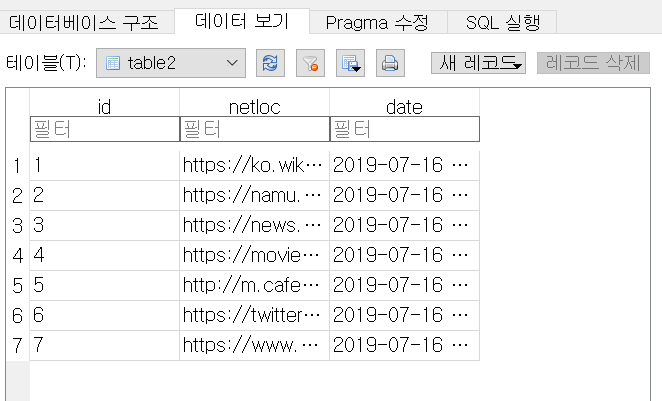

In [76]:
cur.executescript("""
            DROP TABLE IF EXISTS table1;
            CREATE TABLE table1(
            id     INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            table2_id INTEGER NOT NULL,
            path   TEXT,
            param  TEXT NOT NULL,
            seen   BOOLEAN DEFAULT FALSE NOT NULL,
            date   TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
            
            );
            DROP TABLE IF EXISTS table2;
            CREATE TABLE table2(
            id     INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            netloc TEXT NOT NULL,
            date   TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
            
            
            );

"""
)
con.commit()

In [77]:
queue =list()
for href in ([_.find_parent()["href"] for _ in dom.select(".LC20lb")]):
    netloc = "://".join(requests.compat.urlparse(href)[:2])
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
    netlocID = cur.fetchone()
    
    if not netlocID:
        cur.execute("INSERT INTO table2(netloc) VALUES(?)",[netloc])
        
        con.commit()
        
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
        netlocID = cur.fetchone()
    else:
        print(cur.lastrowid,netlocID)
# DB Select Limit 0,1}

2 (2,)
7 (7,)


In [78]:
# Seed URLs 만드는 부분. -> DB Insert 
url = "https://www.google.com/search"
html = download("get", url, param={'q':"박보영"})
dom = BeautifulSoup(html.text, "lxml")

queue =list()
for href in ([_.find_parent()["href"] for _ in dom.select(".LC20lb")]):
    _urlparse = requests.compat.urlparse(href)
    netloc = "://".join(_urlparse[:2])
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
    netlocID = cur.fetchone()
    
    if not netlocID:
        cur.execute("INSERT INTO table2(netloc) VALUES(?)",[netloc])
        
        con.commit()
        
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
        netlocID = cur.fetchone()

    cur.execute("INSERT INTO table1(table2_id, path, param) VALUES( ?, ?, ?)", [netlocID[0], _urlparse[2], _urlparse[4]])
    con.commit()
  

In [79]:
requests.compat.urlparse(html.request.url)

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%EB%B0%95%EB%B3%B4%EC%98%81', fragment='')

In [80]:
i=0
while True:
    cur.execute("""SELECT table1.id, table2.netloc,
                          table1.path, table1.param 
                   FROM table1 
                   JOIN table2 
                       ON table1.table2_id=table2.id
                   Where table1.seen=FALSE
                   ORDER BY table1.date ASC 
                   LIMIT 0,1; """)
    seed= cur.fetchone()
    if not seed or i > 1000:
        break;
    i += 1    
    cur.execute("""
        UPDATE table1
        SET seen=TRUE
        WHERE id=?
    """,[seed[0]])
    con.commit()
    
    baseURL = "{0}{1}?{2}".format(seed[1], seed[2], seed[3])   

    
    for href in parseURL(baseURL):
        _urlparse = requests.compat.urlparse(href)
        netloc = "://".join(requests.compat.urlparse(href)[:2])
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
        netlocID = cur.fetchone()
        if not netlocID:
            cur.execute("INSERT INTO table2(netloc) VALUES(?)",[netloc])

            con.commit()

            cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
            netlocID = cur.fetchone()

        cur.execute("INSERT INTO table1(table2_id, path, param) VALUES(?,?,?)", [netlocID[0],_urlparse[2], _urlparse[4]])
        con.commit()
        break;

https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81? []
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81? []
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D? []
https://news.joins.com/article/22895953? []
https://movie.daum.net/person/main?personId=105244 []
http://m.cafe.daum.net/parkboyoungfd? []
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81? []
https://www.msn.com/ko-kr/entertainment/news/%EB%84%88%EC%9D%98-%EA%B2%B0%ED%98%BC%EC%8B%9D-%E2%86%92-%EC%96%B4%EB%B9%84%EC%8A%A4-%EB%B0%95%EB%B3%B4%EC%98%81-%EA%B7%BC%ED%99%A9-%EC%82%B4%ED%8E%B4%EB%B3%B4%EB%8B%88%E2%80%A6%E2%80%9C%EC%97%AC%EC%A0%84%ED%9E%88-%EB%BD%80%EB%B8%94%EB%A6%AC%E2%80%9D/ar-BBUOmqm? []


### 2-5 구글 검색 값 db에 넣기

In [82]:
con = sqlite3.connect("2.db")
cur = con.cursor()

In [83]:
##table 만듭시다

cur.executescript("""
    DROP TABLE IF EXISTS table1;
    
    CREATE TABLE table1(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        table2_id INTEGER NOT NULL,
        path TEXT NOT NULL,
        param TEXT,
        depth INTEGER NOT NULL,
        inbound INTEGER NOT NULL,
        seen BOOLEAN DEFAULT FALSE NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    );  
    
    
    DROP TABLE IF EXISTS table2;    
    CREATE TABLE table2(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        netloc TEXT NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    );    
    
""")
con.commit()


In [84]:
# Seed URLs 만드는 부분. -> DB Insert 
url = "https://www.google.com/search"
html = download("get", url, param={'q':"박보영"})
dom = BeautifulSoup(html.text, "lxml")


for href in ([_.find_parent()["href"] for _ in dom.select(".LC20lb")]):
    _urlparse = requests.compat.urlparse(href)
    netloc = "://".join(requests.compat.urlparse(href)[:2])
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc]) #꼭 netloc를 sequence로 넘겨줘야 한다!
    netlocID = cur.fetchone()
    
    if not netlocID:
        cur.execute("INSERT INTO table2(netloc) VALUES(?)",[netloc])
        
        con.commit()
        
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
        netlocID = cur.fetchone()
        
    cur.execute("""INSERT INTO table1(table2_id, path, param, depth, inbound)
                VALUES(?,?,?,?,?)""", [netlocID[0], _urlparse[2], _urlparse[4], 1, ""])
    con.commit()

In [85]:
##크롤링!!!!

i=0
while True:
    cur.execute("""SELECT table1.id, table2.netloc,
                          table1.path, table1.param, table1.depth, table2.id
                   FROM table1 
                   JOIN table2 
                       ON table1.table2_id=table2.id
                   Where table1.seen=FALSE and table1.depth < 3
                   ORDER BY table1.date ASC 
                   LIMIT 0,1; """)
    seed= cur.fetchone()   

    if not seed or i > 1000:
        break;
    i += 1    
    cur.execute("""
        UPDATE table1
        SET seen=TRUE
        WHERE id=?
    """,[seed[0]])
    con.commit()
    
    baseURL = "{0}{1}?{2}".format(seed[1], seed[2], seed[3])   

    
    for href in parseURL(baseURL):
        _urlparse = requests.compat.urlparse(href)
        netloc = "://".join(requests.compat.urlparse(href)[:2])
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
        netlocID = cur.fetchone()
        if not netlocID:
            cur.execute("INSERT INTO table2(netloc) VALUES(?)",[netloc])

            con.commit()

            cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1" ,[netloc])
            netlocID = cur.fetchone()

        cur.execute("INSERT INTO table1(table2_id, path, param, depth, inbound) VALUES(?,?,?,?,?)", [netlocID[0],_urlparse[2], _urlparse[4], seed[4]+1, seed[5]])
        con.commit()

https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81? []
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81? []
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D? []
https://news.joins.com/article/22895953? []
https://movie.daum.net/person/main?personId=105244 []
http://m.cafe.daum.net/parkboyoungfd? []
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81? []
https://www.msn.com/ko-kr/entertainment/news/%EB%84%88%EC%9D%98-%EA%B2%B0%ED%98%BC%EC%8B%9D-%E2%86%92-%EC%96%B4%EB%B9%84%EC%8A%A4-%EB%B0%95%EB%B3%B4%EC%98%81-%EA%B7%BC%ED%99%A9-%EC%82%B4%ED%8E%B4%EB%B3%B4%EB%8B%88%E2%80%A6%E2%80%9C%EC%97%AC%EC%A0%84%ED%9E%88-%EB%BD%80%EB%B8%94%EB%A6%AC%E2%80%9D/ar-BBUOmqm? []
https://www.msn.com/ko-kr/entertainment/news/%EB%B0%95%EB%B3%B4%EC%98%81-tvn-%EB%93%9C%EB%9D%BC%EB%A7%88-%EC%96%B4%EB%B9%84%EC%8A%A4-%EC%97%AC%EC%A3%BC%EC%9D%B8%EA%B3%B5/ar-BBLZzVh? []


In [86]:
# seed[1], seed[2], seed[3]이 아마 table2.netloc, table1.path, table1.param일 것인데 주소에 들어갈 내용들이라 얘들만 뽑은걸걸

### 2-6 스크래핑 심화

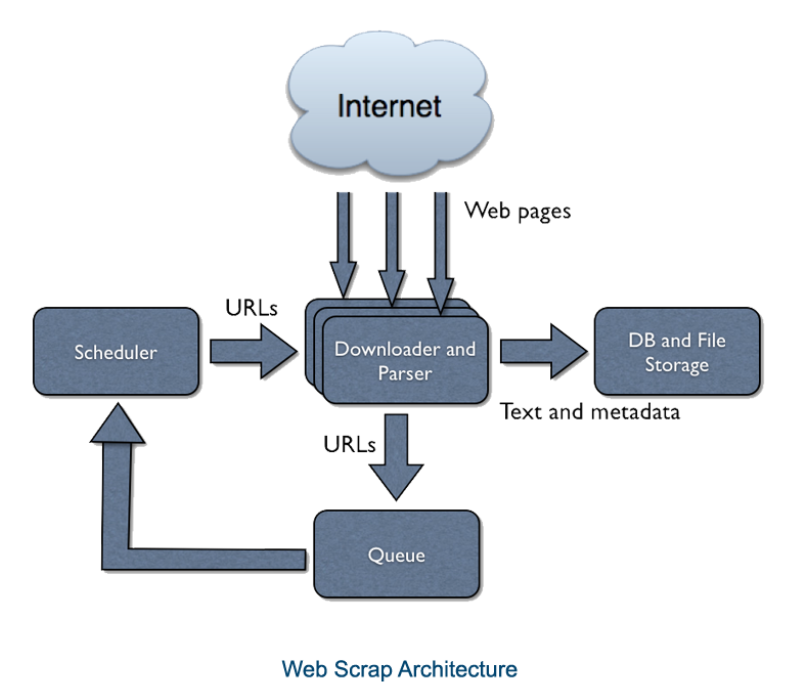

**문제될 수 있는 오류**
- Legacy encoding “euc-kr” used. Documents must use UTF-8.
- tag 마무리가 잘 안되면 크롤링할 때 예상과는 다른 데이터 가져올 수도 있다

### 2-6-1 뽑뿌에서 데이터 가져오기

In [88]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
url = "http://www.ppomppu.co.kr/zboard/zboard.php"

param = {
    "id": "ppomppu",
    "page" : 1
}
html = download("get",url,param)
dom = BeautifulSoup(html.text, "lxml")

In [89]:
html.url

'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu&page=1'

In [90]:
len(dom.select("tr[class^=list]")) 
# html 구조에서 가져올 만한 것들의 공통된 요소를 찾음

21

In [93]:
for tr in dom.select("tr[class^=list]")[:1]:
    td = tr.find_all("td", recursive=False)
    print(td[3].text.strip())
    print(td[3])

# 이렇게 제일 앞의 내용은 필요 없는 내용 -> 빼자

[필독] 제목에는 특수 문자 사용을 절대 금지합니다.- 2010년 2월 24일
<td align="left" class="list_vspace">
<a href="view.php?id=regulation&amp;page=1&amp;divpage=202&amp;no=6">[필독] 제목에는 특수 문자 사용을 절대 금지합니다.- 2010년 2월 24일</a>
</td>


In [95]:
for tr in dom.select("tr[class^=list]")[1:]:
    td = tr.find_all("td", recursive=False)
    print(td[3].text.strip())
    print(td[3])

[위메프] 물티슈 100x 40팩 16,800/무료
<td align="left" class="list_vspace">
<table border="0" cellpadding="0" cellspacing="0" height="100%" style="table-layout:fixed" width="100%">
<tr>
<td align="right" style="padding:0 5px 0 0" valign="top" width="75"><a href="zboard.php?id=ppomppu&amp;page=1&amp;divpage=56&amp;&amp;no=323951" onfocus="blur()"><img align="absmiddle" border="0" class="thumb_border" height="50" onfocus="blur()" src="//static.ppomppu.co.kr/www/img/noimage/noimage_60x50.jpg" style="margin:0px 5px 0px 5px;" width="60"/></a></td>
<td valign="middle">
<a href="zboard.php?id=ppomppu&amp;page=1&amp;divpage=56&amp;no=323951"><font class="list_title">[위메프] 물티슈 100x 40팩 16,800/무료</font></a> </td></tr></table></td>
[티몬] 컬쳐랜드 (91,400 카드결제)  16
<td align="left" class="list_vspace">
<table border="0" cellpadding="0" cellspacing="0" height="100%" style="table-layout:fixed" width="100%">
<tr>
<td align="right" style="padding:0 5px 0 0" valign="top" width="75"><a href="zboard.php?id=ppomppu&amp

In [96]:
# 필요한 것만 가져와보자
for tr in dom.select("tr[class^=list]")[1:]:
    td = tr.find_all("td", recursive=False)
    print(td[3].select("td[valign=middle]>a")[0].text)

[위메프] 물티슈 100x 40팩 16,800/무료
[티몬] 컬쳐랜드 (91,400 카드결제)
[티몬] 욕실화 1900원 리빙박스 3900원 (1900원/무배)
[11번가] 블록맞춤 소피생리대 (2,500원/무료)
[인터파크] 오뚜기밥(11,220/2500)
[옥션] 스클 마카오 쉐라톤 2박 4일 자유여행 (269,000원/무료)
[위메프] 업그레이드! 더 커진 빅 다용도 잠자리채 1+1 (5,500원/무료배송)
[옥션]광동 플레이버워터 라임 500ml×24 (4,900/무료배송)
[공영쇼핑] 키친아트 5.8L 에어프라이어 (49,905/무료)
[11번가] 순수식품 맛있는 단백질두유 플레인두유 20팩×190ml(7,900/무료배송)
[g9] 에어팟2 유선충전모델+실리콘케이스 국내정발(173800/무료) 스마일클럽 146058원
[G마켓] 과일나라 진주펄 염색약 1+1+사은품     (5,900/ 무료)
[우체국 쇼핑몰] 농가돕기 무안 햇양파 5kg (대)  (4900/무료)
[인터파크] 코카콜라 500ml*24펫(13,800원/무료) 파르카디아 우유 1L*12팩(12,500원/무료) 비비고 사골곰탕 500g*18봉(11,900원/무료) 외
[위메프] HP 엘리트북 X360 1040 G5 (1,670,000/무료)
[위메프] 썬리빙 에어프라이어 블랙에디션 5.5L (58,400/무료)
[티몬] 지리산 물하나 2.0L X 12병 (4,900원/무료배송)
 [위메프] 갤럭시탭A8.0 2019+라미펜(242,850/무료)
[위메프] 해피머니 10만원 상품권(93,500원/무료)
[티몬] 해피머니 온라인상품권10만원권 (카드딜90,900원/무료)/(계좌이체딜90,500원,3장 구입시 1,600원추가할인가능/무료)


In [97]:
# 주소와 추천수, 조회수까지 가져와보자
for tr in dom.select("tr[class^=list]")[1:]:
    td = tr.find_all("td", recursive=False)
    print(requests.compat.urljoin(url, td[3].a.img['src']))
    print(td[3].select("td[valign=middle]>a")[0].text)
    temp = td[5].text.split("-")
    print((0,0) if len(temp) < 2 else ",".join(temp))
    print(td[6].text.strip()) # strip은 양 옆의 공백 제거
    print()

http://static.ppomppu.co.kr/www/img/noimage/noimage_60x50.jpg
[위메프] 물티슈 100x 40팩 16,800/무료
(0, 0)
208

http://static.ppomppu.co.kr/www/img/noimage/noimage_60x50.jpg
[티몬] 컬쳐랜드 (91,400 카드결제)
3 , 0
1520

http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/9/small_323949.jpg?t=20190717081020
[티몬] 욕실화 1900원 리빙박스 3900원 (1900원/무배)
1 , 0
1859

http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/7/small_323947.jpg?t=20190717080423
[11번가] 블록맞춤 소피생리대 (2,500원/무료)
(0, 0)
629

http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/6/small_323946.jpg?t=20190717080405
[인터파크] 오뚜기밥(11,220/2500)
(0, 0)
955

http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/5/small_323945.jpg?t=20190717075907
[옥션] 스클 마카오 쉐라톤 2박 4일 자유여행 (269,000원/무료)
(0, 0)
3032

http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/2/small_323942.jpg?t=20190717062034
[위메프] 업그레이드! 더 커진 빅 다용도 잠자리채 1+1 (5,500원/무료배송)
2 , 0
5137

http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/1/small_323941.jpg?t=20190717033635
[옥션]광동 플레이버워터 라임 500ml×24 (4,9

In [98]:
def parseURL(seed):    
    html = download("get", seed)
    dom = BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(seed,_.find_parent()["href"]) for _ in dom.select("font.list_title") \
             if _.find_parent() and _.find_parent().has_attr("href")]

def parseContent(seed):    
    html = download("get", seed) #seed[0]은 주소
    dom = BeautifulSoup(html.text, "lxml")
    
    return {"title":dom.select_one("font.view_title2").text.strip(),
           "body": dom.select_one("td.board-contents").text.strip(),
           "comments":[_.text.strip() for _ in dom.select("div[id^=commentContent_]")]}



In [99]:
#page10까지 가져오기

url = "https://www.ppomppu.co.kr/zboard/zboard.php"
html = download("get", url, param={"id":"freeboard"})
dom = BeautifulSoup(html.text, "lxml")


seed = list()

seed.extend([requests.compat.urljoin(url, _["href"]) for _ in dom.select("#page_list a")])

seen = list()
queue = list()

while seed:
    baseURL=seed.pop(0)
    seen.append(baseURL)
    #time.sleep(1)        
    linkList=parseURL(baseURL)
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("queue: {0}, seen:{1}".format(len(queue),len(seen)))

queue: 30, seen:1
queue: 60, seen:2
queue: 90, seen:3
queue: 120, seen:4
queue: 150, seen:5
queue: 179, seen:6
queue: 209, seen:7
queue: 239, seen:8
queue: 269, seen:9
queue: 299, seen:10


In [100]:
cur.executescript("""
            DROP TABLE IF EXISTS table3;
            CREATE TABLE table3(
            id     INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            title  TEXT NOT NULL,
            content TEXT NOT NULL,
            date   TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
            
            );
            DROP TABLE IF EXISTS table4;
            CREATE TABLE table4(
            id     INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
            table3_id INTEGER NOT NULL,
            comment TEXT NOT NULL
            
            );

"""
)
con.commit()

In [101]:
while queue:
    baseURL = queue.pop(0)
    seen.append(baseURL)
    content = parseContent(baseURL)
    cur.execute("""
        INSERT INTO table3
        (title, content)
        VALUES(?, ?)
    """, [content["title"], content["body"]])
    con.commit()
    
    cur.execute("""
        SELECT id
        FROM table3
        WHERE title=? AND content=?;
    """, [content["title"], content["body"]])
    table3_id = cur.fetchone()[0]
    
    for comment in content["comments"]:
        cur.execute("""
            INSERT INTO table4
            (table3_id, comment) 
            VALUES(?,?)
    """, [table3_id, comment])  
    con.commit()

KeyboardInterrupt: 

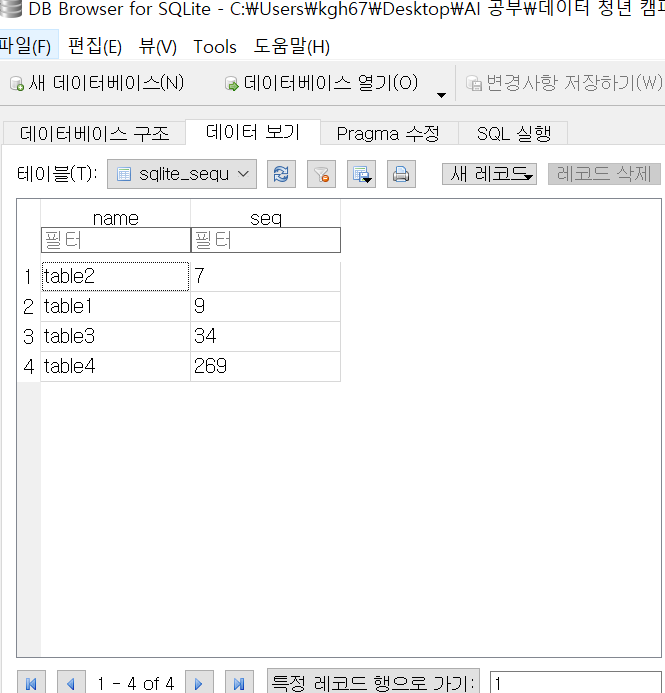

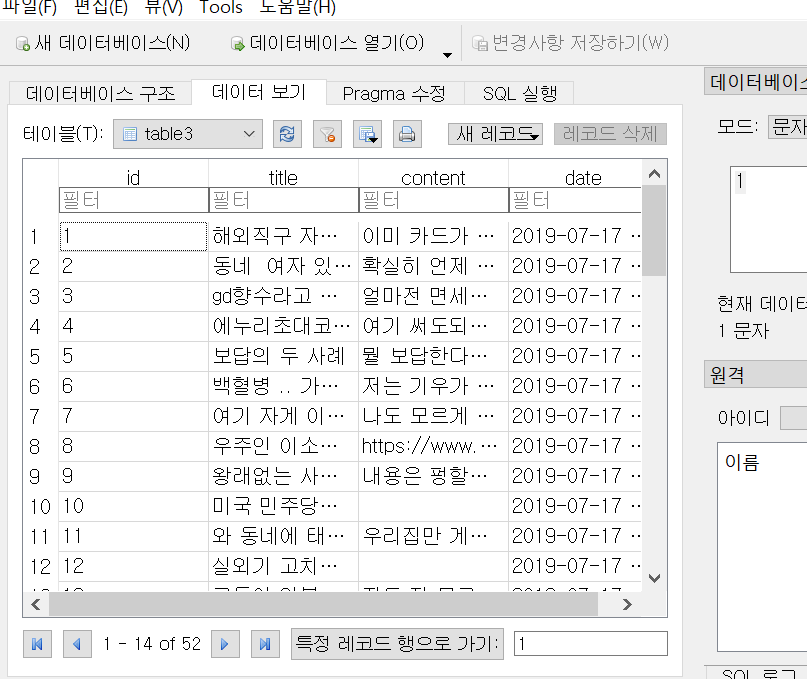

**주의 : 원래 오류가 떠야 한다** 
- 정지시키지 않으면 오류가 안 뜨지만, 정지 시키면 'Unexpected EOF'에러가 있음을 확인할 수 있다
- 소스 페이지를 보면 han이라는 클래스가 클래스가 종료되기 전에 또 생긴다(상속과는 다름)
- 이러한 오류를 바로 잡아줘야